In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from plot_search_results import (
    plot_hypervolumes_set,
    plot_pareto_front,
    plot_pareto_front3D,
    plot_1D_obj_scatter,
    plot_1D_obj_confidence_interval,
    plot_2D_obj_confidence_interval,
    plot_obj_progression_set
)
from run_seed_comparisons import run_seed_results_comparisons

In [2]:
plt.style.use('/Users/kdreyer/Documents/Github/GraphGA/paper.mplstyle.py')
orange_ = [i/255 for i in [230, 159, 0]]
sky_blue = [i/255 for i in [86, 180, 233]]
pink_ = [i/255 for i in [204, 121, 167]]
bluish_green = [i/255 for i in [0, 158, 115]]
vermillion = [i/255 for i in [213, 94, 0]]
yellow_ = [i/255 for i in [240, 228, 66]]

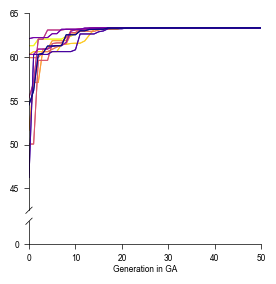

In [3]:
path_amplifier = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/Amplifier_single_cell/Original_hyperparams_vary_dose/"
results_runs = "Amplifier_single_cell_vary_dose_original_hp_seed_"
run_seed_results_comparisons(path_amplifier, results_runs, 1, ["ON_rel"], 50)